Tasks to do:
1. Implement a plot for ages of sex offenders in bins, e.g. 20-30, 30-40, etc.
2. Make a plot for sex offenses by gender.
3. What dates are in the dataset? Unfortunately, it does not tell us the dates of the crimes.
4. Make a box-and-wisker plot for ages of sex offenders.
5. Calculate descriptive stats. E.g. Median age of sex offenders. Mean, median, mode, variance, standard deviation, and range.
6. Make a bivariate analysis. E.g. Gender with the block and number of offenders.
7. Write a summary at the top that describes the plots and statistics for sex offender data. Then, do the same for the crime data.

Summary

This notebook does exploratory data analysis (ERD) on Chicago's crime databases. There are two main data sources: 1. City of Chicago's Crime Database which is a qualitive dataset. 2. The Chicago Sex Offender Database which is a qualitative dataset.

This database shows the City of Chicago's database of sex offenders. It uses the Socrata 2.0 API with endpoint shown here(JSON) "https://data.cityofchicago.org/resource/vc9r-bqvy.json".

This database shows the City of Chicago's overall crime database with API endpoint "https://data.cityofchicago.org/resource/x2n5-8w5q.json".

The cell below uses the API endpoint to get data for Chicago crimes. The object returned is a list type.

In [5]:
import requests

response_1 = requests.get("https://data.cityofchicago.org/resource/vc9r-bqvy.json?$limit=50000&$offset=0")

# This dataset has the sex offender's data.
crime_data_1 = response_1.json()

In [6]:
import sys
sys.executable

'D:\\Anaconda\\envs\\test\\python.exe'

In [7]:
# print the first 100 rows for inspection
for i in range(0, 100):
    print(crime_data_1[i])

print(len(crime_data_1))

{'last': 'VALLEJO', 'first': 'MAURICE', 'block': '0000X  0', 'gender': 'MALE', 'race': 'WHITE HISPANIC', 'birth_date': '06/19/1970', 'height': '509', 'weight': '170', 'victim_minor': 'Y'}
{'last': 'BALENTINE', 'first': 'RUFUS', 'block': '0000X  165TH ST', 'gender': 'MALE', 'race': 'BLACK', 'birth_date': '03/10/1958', 'height': '603', 'weight': '300', 'victim_minor': 'Y'}
{'last': 'DROZD', 'first': 'ERIC', 'block': '0000X  28W012 GALUSHA', 'gender': 'MALE', 'race': 'WHITE', 'birth_date': '06/16/1984', 'height': '511', 'weight': '145', 'victim_minor': 'N'}
{'last': 'FREEMAN', 'first': 'GARY', 'block': '0000X  ANNABLE COURT', 'gender': 'MALE', 'race': 'WHITE', 'birth_date': '02/19/1965', 'height': '511', 'weight': '200', 'victim_minor': 'Y'}
{'last': 'BELL', 'first': 'ARMOUR', 'block': '0000X  ANNABLE CT', 'gender': 'MALE', 'race': 'BLACK', 'birth_date': '10/11/1935', 'height': '601', 'weight': '152', 'victim_minor': 'Y'}
{'last': 'WINKOWITISCH', 'first': 'CHAD', 'block': '0000X  BRUCE LA

In [8]:
import pandas as pd

df = pd.DataFrame(crime_data_1) # Convert crime data from a list to a DataFrame.

df.head(10)

df = df.sort_values(by = df.columns[1]) # Sort the values by first.

df.head(10)

last  first                          block gender            race  \
3083     FOSTER  AARIN       15XXX S ROSE RIDGE COURT   MALE           BLACK   
780     COLEMAN  AARON                015XX E 73RD PL   MALE           BLACK   
2654  ZIELINSKI  AARON          087XX S BALTIMORE AVE   MALE           WHITE   
1893      ONEAL  AARON               057XX S GREEN ST   MALE           BLACK   
146    BLACKHAM  AARON           002XX  MASONIC DRIVE   MALE           WHITE   
1380      JONES  AARON           038XX W FERDINAND ST   MALE           WHITE   
3550     ROGERS  AARON       (registered as homeless)   MALE           BLACK   
1299       CRUZ  AARON              034XX S MORGAN ST   MALE  WHITE HISPANIC   
1239    AGUILAR  AARON  030XX  SUMMERFIELD RIDGE LANE   MALE  WHITE HISPANIC   
1978     WALKER  AARON            060XX S NORMAL BLVD   MALE           BLACK   

      birth_date height weight victim_minor  
3083  04/02/1975    600    195            Y  
780   03/31/1961    511    170            Y  
2654  01/18/1993    600    190            Y  
1893  10/04/1965    601    193            N  
146   05/15/1970    510    185            Y  
1380  05/28/1990    600    181            Y  
3550  01/02/2000    504    109            Y  
1299  07/06/1999    505    280            N  
1239  05/12/1984    600    240            Y  
1978  12/26/1967    507    150            Y

In [9]:
# Clean the data by checking for columns with null values.
print(type(crime_data_1))

print(type(crime_data_1[0]))

# Find the percentage of null or missing values
null_percent = round(100 * (df.isnull().sum() / len(df.index)), 2)

# Print the columns which have more than 0% missing values.
null_percent[null_percent > 0]

null_indices = df['block'].isnull()

print(df[null_indices].head(10))

<class 'list'>
<class 'dict'>
         last    first block gender            race  birth_date height weight  \
3668      COE    ALVIN   NaN   MALE           BLACK  05/04/1979    603    197   
3691    SMITH    BOBBY   NaN   MALE           BLACK  01/30/1960    600    480   
3669  COLLIER   CALVIN   NaN   MALE           BLACK  02/22/1961    506    151   
3690  SANCHEZ   CARLOS   NaN   MALE  WHITE HISPANIC  08/28/1972    510    180   
3672   FARRIS  CEDRICK   NaN   MALE           BLACK  04/18/1968    506    169   
3681   MILLER     DALE   NaN   MALE           BLACK  03/27/1953    507    162   
3682   MURPHY    DANTE   NaN   MALE           BLACK  10/24/1991    510    140   
3694    TRULL   DWAYNE   NaN   MALE           BLACK  02/07/1961    508    165   
3680    MATOS    EDWIN   NaN   MALE  WHITE HISPANIC  06/29/1965    507    145   
3677  JIMENEZ   EFRAIN   NaN   MALE  WHITE HISPANIC  05/25/1946    505    140   

     victim_minor  
3668            N  
3691            Y  
3669            Y 

The print statement above shows that block is the only column with missing values at 0.76% missing or NaN. This column will be cleaned by way of imputation. That is, I shall make the missing block values contain unknown.

In [11]:
# In the block column, replace all NaN with unknown.
df['block'].fillna('unknown', inplace=True)

rows = df[df['block'] == 'unknown']

rows.head(10)

C:\Users\david\AppData\Local\Temp\ipykernel_12944\1875386691.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['block'].fillna('unknown', inplace=True)


last    first    block gender            race  birth_date height  \
3668      COE    ALVIN  unknown   MALE           BLACK  05/04/1979    603   
3691    SMITH    BOBBY  unknown   MALE           BLACK  01/30/1960    600   
3669  COLLIER   CALVIN  unknown   MALE           BLACK  02/22/1961    506   
3690  SANCHEZ   CARLOS  unknown   MALE  WHITE HISPANIC  08/28/1972    510   
3672   FARRIS  CEDRICK  unknown   MALE           BLACK  04/18/1968    506   
3681   MILLER     DALE  unknown   MALE           BLACK  03/27/1953    507   
3682   MURPHY    DANTE  unknown   MALE           BLACK  10/24/1991    510   
3694    TRULL   DWAYNE  unknown   MALE           BLACK  02/07/1961    508   
3680    MATOS    EDWIN  unknown   MALE  WHITE HISPANIC  06/29/1965    507   
3677  JIMENEZ   EFRAIN  unknown   MALE  WHITE HISPANIC  05/25/1946    505   

     weight victim_minor  
3668    197            N  
3691    480            Y  
3669    151            Y  
3690    180            Y  
3672    169            Y  
3681    162            N  
3682    140            Y  
3694    165            N  
3680    145            Y  
3677    140            Y

In [12]:
# What comumns are present in the data?
df.columns

Index(['last', 'first', 'block', 'gender', 'race', 'birth_date', 'height',
       'weight', 'victim_minor'],
      dtype='object')

In [13]:
print( df['first'].dtype )# verify its a string type

countFirst = df['first'].value_counts() # counts instances of each first name

print(countFirst.head(20)) # prints the first 20 values for first names DF

countRace = df['race'].value_counts() # counts instances of each race

print(countRace.head(20))

countLast = df['last'].value_counts() # counts instances of each last name

print(countLast.head(20))

countHeight = df['height'].value_counts()

print(countHeight)

countMinor = df['victim_minor'].value_counts()

print(countMinor)

countBlock = df['block'].value_counts()

print(countBlock)

object
first
MICHAEL        114
JAMES           74
ROBERT          67
DAVID           66
ANTHONY         55
JOHN            51
JOSE            48
WILLIAM         43
JOSEPH          39
CHRISTOPHER     39
CHARLES         38
RICHARD         34
ERIC            32
ANTONIO         29
KEVIN           29
KENNETH         28
LARRY           28
LUIS            28
JUAN            26
THOMAS          26
Name: count, dtype: int64
race
BLACK                           2084
WHITE                            854
WHITE HISPANIC                   692
ASIAN / PACIFIC ISLANDER          35
BLACK HISPANIC                    20
UNKNOWN / REFUSED                 10
AMER INDIAN / ALASKAN NATIVE       3
Name: count, dtype: int64
last
WILLIAMS     59
JOHNSON      41
JONES        36
JACKSON      35
SMITH        31
DAVIS        30
RODRIGUEZ    29
THOMAS       25
GARCIA       24
BROWN        22
HARRIS       21
MOORE        20
ROBINSON     17
MARTINEZ     17
LOPEZ        17
ANDERSON     16
LEWIS        16
WHITE        1

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# This function constructs a bar plot. It gets called to make several different plots.
# Args; data(series), xlabel(string), ylabel(string), title(string), colorScheme(1; inferno, 2; plasma, 3; magma)
def make_plot(data, xlabel, ylabel, title, colorScheme):
    fig, ax = plt.subplots(figsize = (15, 10))
    
    if (colorScheme == 1):
        colors = plt.cm.inferno(np.linspace(0, 1, 10))

    if (colorScheme == 2):
        colors = plt.cm.plasma(np.linspace(0, 1, 10))
        
    if (colorScheme == 3):
        colors = plt.cm.magma(np.linspace(0, 1, 10))

    data[:10].plot.bar(ax = ax, color = colors)

    plt.xticks(rotation = 45, fontsize = 12)

    plt.tight_layout()

    plt.xlabel(xlabel,fontsize = 20)

    plt.ylabel(ylabel, fontsize = 20)

    plt.title(title, fontsize = 20)

    plt.show()



First, there will be some plots showing a univariate analysis. The plot below shows the 10 Blocks With The Most Sex Offenders. This is a univariate analysis of the data that investigates the block and it's sex offender count.

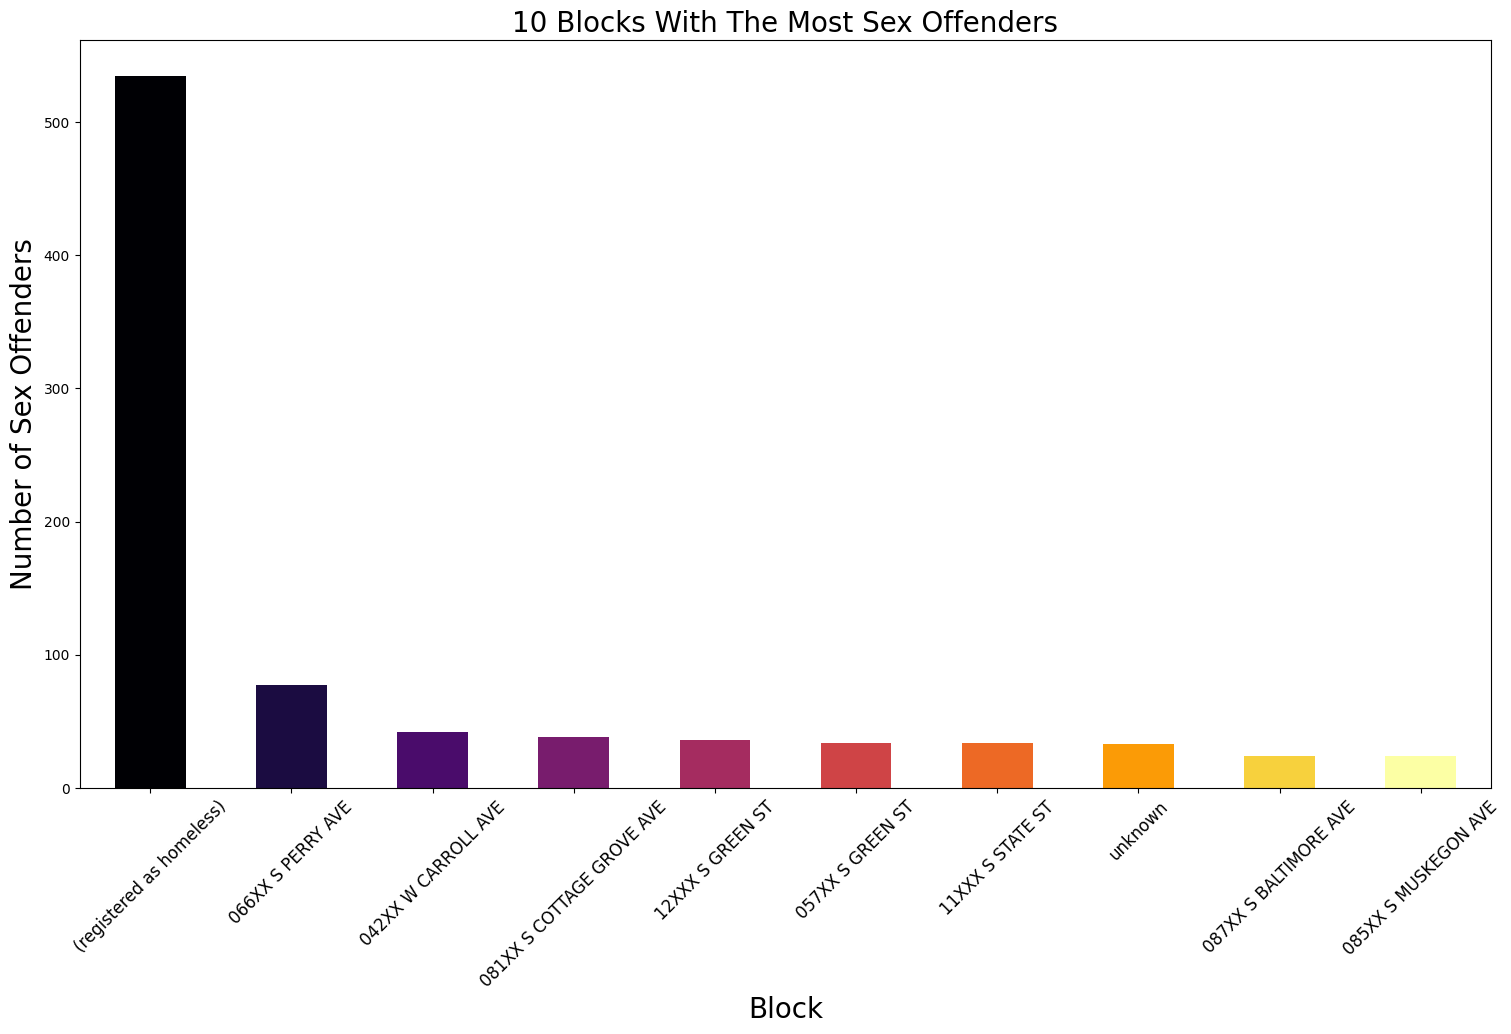

In [16]:
make_plot(data = countBlock, xlabel = "Block", ylabel = "Number of Sex Offenders", title = "10 Blocks With The Most Sex Offenders", colorScheme = 1)

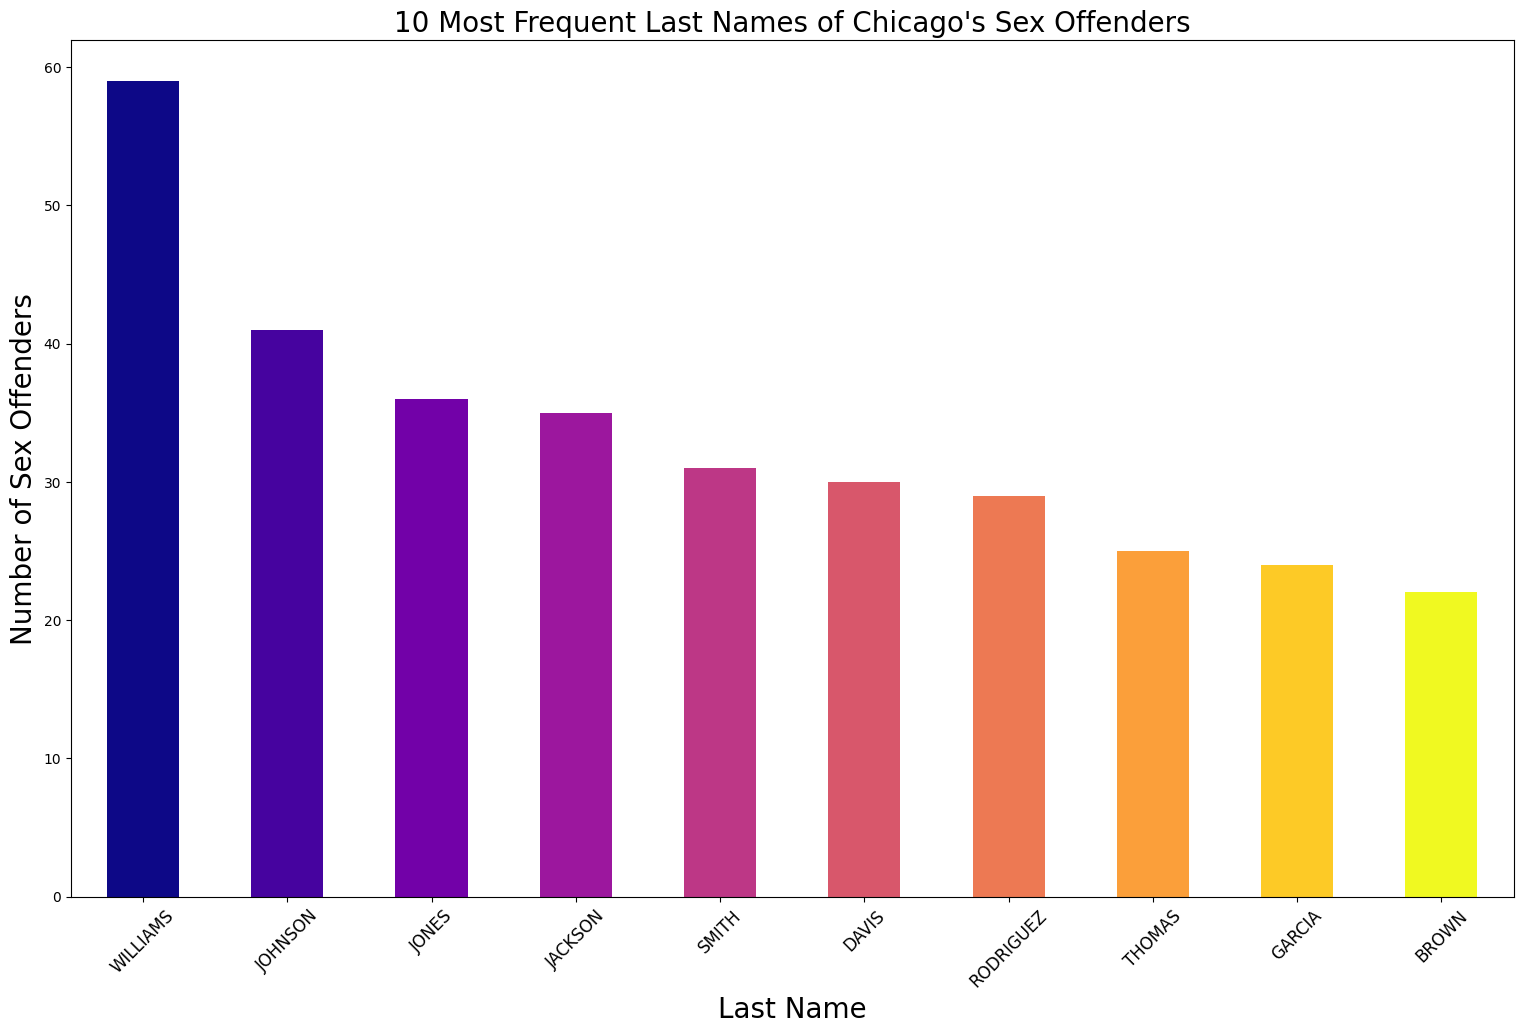

In [17]:
make_plot(data = countLast, xlabel = "Last Name", ylabel = "Number of Sex Offenders", title = "10 Most Frequent Last Names of Chicago's Sex Offenders", colorScheme = 2)

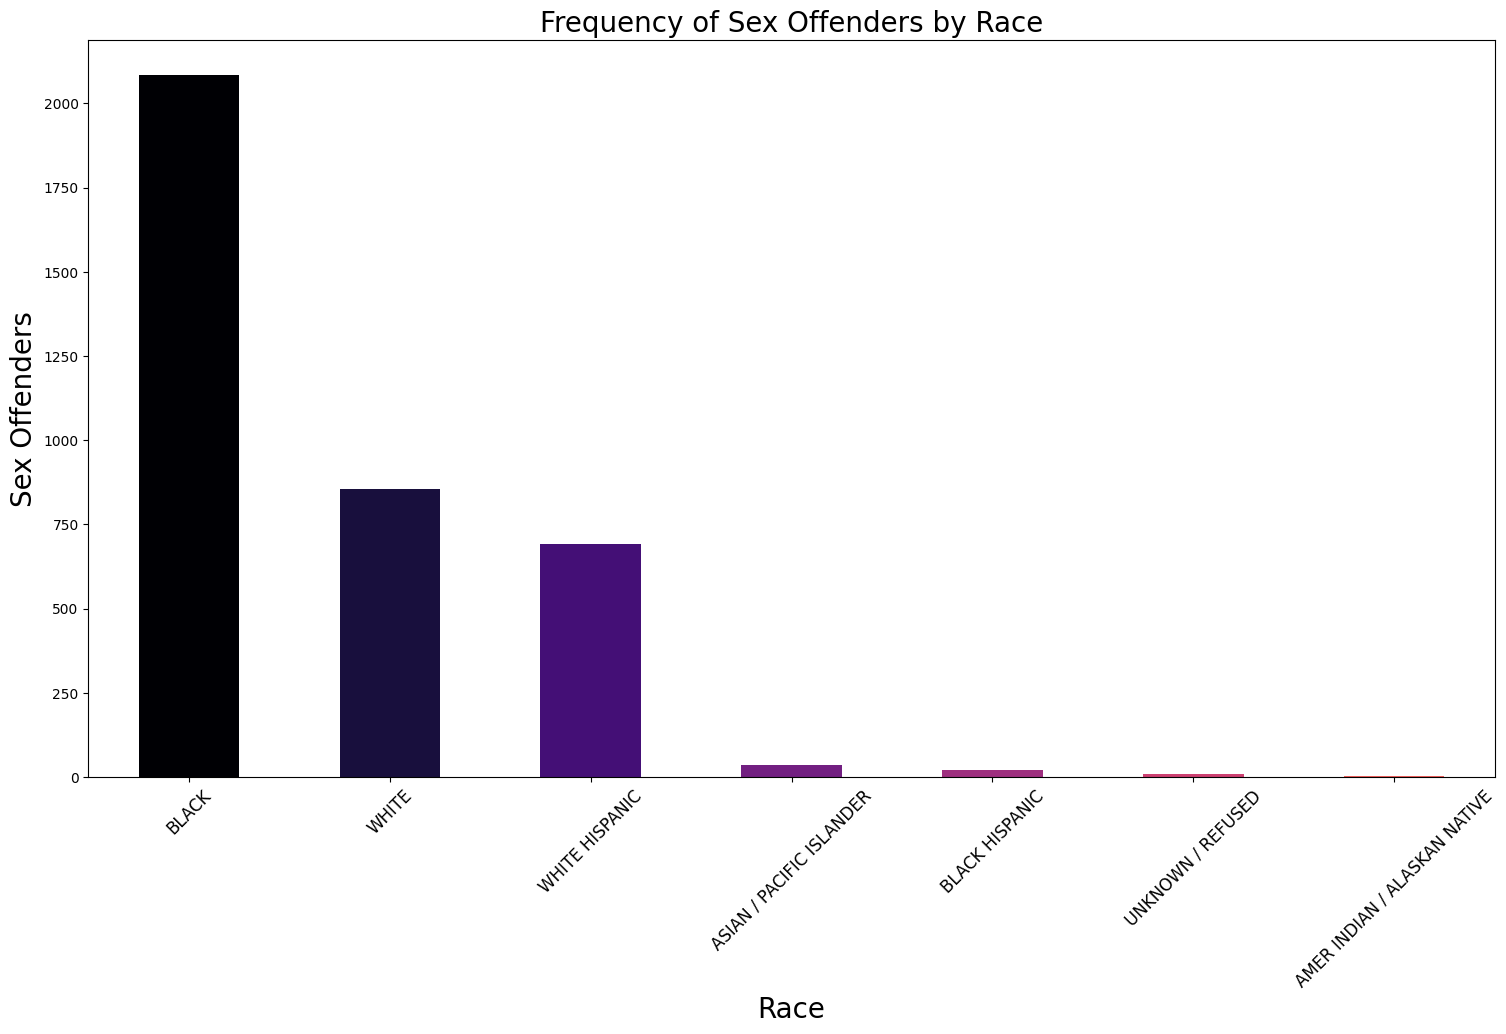

In [18]:
make_plot(data = countRace, xlabel = "Race", ylabel = "Sex Offenders", title = "Frequency of Sex Offenders by Race", colorScheme = 3)

The plot below shows the distribution of gender for sex offenders. This is a univariate analysis that compares gender and sex offender count.

Text(0.5, 1.0, 'Sex Offenders by Gender')

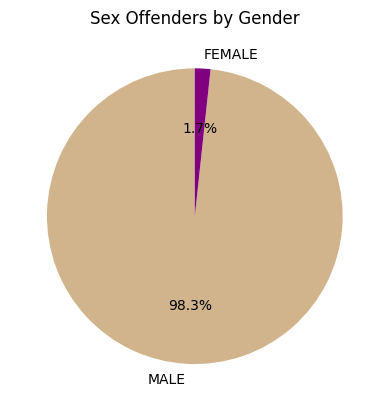

In [20]:
# Construct a pie plot that shows the sexual offenses by gender.

# Count all the occurrences by gender.
gender_counts = df['gender'].value_counts()

gender_counts.head(10)

gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=gender_counts.index, colors=['#D2B48C','purple'])

plt.ylabel('')

plt.title('Sex Offenders by Gender')

In [34]:
# Inspect the data schema.
df.columns

Index(['last', 'first', 'block', 'gender', 'race', 'birth_date', 'height',
       'weight', 'victim_minor'],
      dtype='object')

The cell below prepares the data for a plot that shows the ages of all sex offenders. It handles the logic for computing the age of each record. The age and gender boxplot is a multivariate analysis of the data.

In [60]:
from datetime import datetime

today = datetime.today()

# convert the birth_date to datetime

df['birth_date'] = pd.to_datetime(df['birth_date'])

# handles the logic for calculating the age for each record

age_data = pd.DataFrame(df['birth_date'].apply(lambda row: int(today.year - row.year - ((today.month, today.day) < (row.month, row.day) ))) ) 

age_data = age_data.rename(columns={'birth_date': 'age'})

age_data.columns

age_data.head(10)

age
3083   49
780    63
2654   31
1893   59
146    54
1380   34
3550   24
1299   25
1239   40
1978   56

Text(0.5, 0, 'Age')

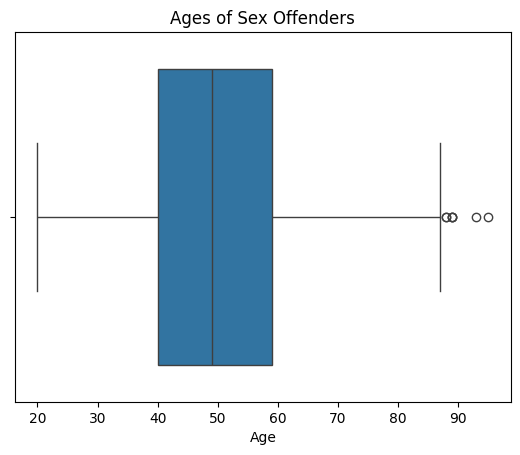

In [82]:
# Make a box plot using ages of sex offenders. Add title and labels.
import seaborn as sns

sns.boxplot(data = age_data, x = 'age')

plt.title('Ages of Sex Offenders')

plt.xlabel('Age')

C:\Users\david\AppData\Local\Temp\ipykernel_12944\669975081.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = gender_age, x='age', y='gender', palette = palette)


Text(0, 0.5, 'Gender')

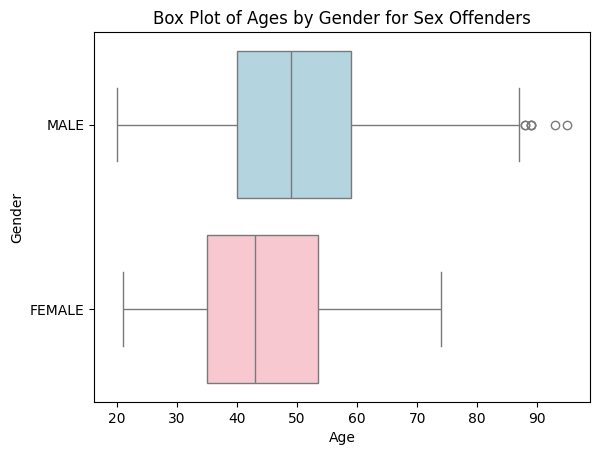

In [78]:
# Make a boxplot using age and gender of sex offenders.
gender_age = pd.concat([age_data, df['gender']], axis = 1)

palette = {'MALE': 'lightblue', 'FEMALE': 'pink'}

sns.boxplot(data = gender_age, x='age', y='gender', palette = palette)

plt.title('Box Plot of Ages by Gender for Sex Offenders')

plt.xlabel('Age')

plt.ylabel('Gender')

plt.show()

The cell blow will be used to calculate descriptive statistics. 
E.g. Mean, median, mode, variance, standard deviation, and range of ages of sex offenders.
Note, the median value is the 50% percentile in the dataset.

In [96]:
#age_data.head(25)

print(age_data['age'].describe())

49.81016765819362 49.0 0    43
Name: age, dtype: int64 12.719277535142323
count    3698.000000
mean       49.810168
std        12.719278
min        20.000000
25%        40.000000
50%        49.000000
75%        59.000000
max        95.000000
Name: age, dtype: float64


The fact that the mean age (49.81 years) and median age (49 years) are close suggests that there is not much skewness in the data and it is reasonably symmetric.
The age range goes from 20 years to 95 years.
The standard deviation of 12.72 years suggests a moderate spread around the mean.


The next task is to use the Chicago Crime Database's API endpoint to get data. It is stored in the names crime_data_2 and crime_data_3.

In [23]:
import requests
import pandas as pd
# This function returns data from the City of Chicago's API in a DataFrame.
# Args: url(API endpoint), limit(number of records to request), offset(first record begins here)
# return: DataFrame with records. More useful for things than JSON because of Pandas.
def get_data(url, limit, offset):
    url = url + "?$limit=" + str(limit) + "&$offset=" + str(offset)
    
    response = requests.get(url)
    
    return pd.read_json(response.text)

In [24]:
crime_data_2 = get_data(url = "https://data.cityofchicago.org/resource/x2n5-8w5q.json", limit = 100000, offset = 0)

# Used a limit of 100,000.

print(len(crime_data_2))

C:\Users\david\AppData\Local\Temp\ipykernel_12944\3201390281.py:11: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  return pd.read_json(response.text)


100000


In [25]:
crime_data_2.head(10)

case_       date_of_occurrence                      block _iucr  \
0  JG545511  2023-12-18T05:15:00.000            015XX W 18TH ST  0610   
1  JG558740  2023-12-18T05:27:00.000           036XX N BROADWAY  0610   
2  JG545265  2023-12-18T05:27:00.000       050XX S EAST END AVE  3960   
3  JG551118  2023-12-18T05:30:00.000  057XX S COTTAGE GROVE AVE  0920   
4  JG545257  2023-12-18T05:35:00.000        061XX W NEWPORT AVE  1320   
5  JG558282  2023-12-18T05:38:00.000      017XX N HUMBOLDT BLVD  2820   
6  JG545994  2023-12-18T05:45:00.000            060XX W 63RD ST  0620   
7  JG545352  2023-12-18T05:51:00.000            018XX W IOWA ST  0820   
8  JG545262  2023-12-18T05:59:00.000            007XX E 61ST ST  2820   
9  JG545294  2023-12-18T06:00:00.000          015XX W WALTON ST  0486   

  _primary_decsription   _secondary_description         _location_description  \
0             BURGLARY           FORCIBLE ENTRY  COMMERCIAL / BUSINESS OFFICE   
1             BURGLARY           FORCIBLE ENTRY  COMMERCIAL / BUSINESS OFFICE   
2         INTIMIDATION             INTIMIDATION                     APARTMENT   
3  MOTOR VEHICLE THEFT     ATTEMPT - AUTOMOBILE                        STREET   
4      CRIMINAL DAMAGE               TO VEHICLE                        STREET   
5        OTHER OFFENSE         TELEPHONE THREAT                     APARTMENT   
6             BURGLARY           UNLAWFUL ENTRY                     APARTMENT   
7                THEFT           $500 AND UNDER   RESIDENCE - PORCH / HALLWAY   
8        OTHER OFFENSE         TELEPHONE THREAT                     APARTMENT   
9              BATTERY  DOMESTIC BATTERY SIMPLE                     APARTMENT   

  arrest domestic  beat  ...  y_coordinate   latitude  longitude  \
0      N        N  1233  ...     1891492.0  41.857827 -87.664383   
1      N        N  1925  ...     1924379.0  41.947978 -87.647652   
2      N        Y   222  ...     1871757.0  41.803182 -87.585432   
3      N        N   233  ...     1867223.0  41.790872 -87.606143   
4      N        N  1633  ...     1922300.0  41.942986 -87.779884   
5      Y        N  1421  ...     1911425.0  41.912740 -87.701945   
6      N        N   812  ...     1862138.0  41.777849 -87.772324   
7      N        N  1212  ...     1906030.0  41.897778 -87.673960   
8      N        Y   313  ...     1864722.0  41.784020 -87.607962   
9      N        Y  1213  ...     1906426.0  41.898819 -87.666056   

                                            location  \
0  {'latitude': '41.857826647', 'longitude': '-87...   
1  {'latitude': '41.947977584', 'longitude': '-87...   
2  {'latitude': '41.803181616', 'longitude': '-87...   
3  {'latitude': '41.790872026', 'longitude': '-87...   
4  {'latitude': '41.942985916', 'longitude': '-87...   
5  {'latitude': '41.912740324', 'longitude': '-87...   
6  {'latitude': '41.777849017', 'longitude': '-87...   
7  {'latitude': '41.897777894', 'longitude': '-87...   
8  {'latitude': '41.78402007', 'longitude': '-87....   
9  {'latitude': '41.898818952', 'longitude': '-87...   

   :@computed_region_awaf_s7ux  :@computed_region_6mkv_f3dw  \
0                          8.0                      14920.0   
1                         37.0                      21186.0   
2                          1.0                      21192.0   
3                         32.0                      22260.0   
4                         25.0                      22254.0   
5                         15.0                      22535.0   
6                         35.0                      22268.0   
7                         16.0                      21560.0   
8                         53.0                      22260.0   
9                         24.0                      22620.0   

  :@computed_region_vrxf_vc4k  :@computed_region_bdys_3d7i  \
0                        33.0                        270.0   
1                        57.0                        726.0   
2                         5.0                        400.0   
3 

Note, this dataset shows the date of occurrence.

In [26]:
url = "https://data.cityofchicago.org/resource/x2n5-8w5q.json"

crime_data_3 = get_data(url, 100000, 100000)

print(len(crime_data_3))

C:\Users\david\AppData\Local\Temp\ipykernel_12944\3201390281.py:11: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  return pd.read_json(response.text)


100000


import kaggle

kaggle.api.dataset_download_files('doyouevendata/chicago-community-areas-geojson', path = './', unzip = True)

print("successfully downloaded the geojson file that contains a map of Chicago.")


import matplotlib.pyplot as plt
import geopandas as gpd

gdf = gpd.read_file('chicago-community-areas.geojson')

fix, ax = plt.subplots()

gdf.plot(ax = ax)

plt.show()

import requests
# raw data in GeoJSON format from the map I want.
url = "https://raw.githubusercontent.com/RandomFractals/ChicagoCrimes/master/data/chicago-community-areas.geojson"

response = requests.get(url)

with open('chicago-areas.geojson', 'w') as file:
    file.write(response.text)

import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file('chicago-areas.geojson')

fix, ax = plt.subplots(figsize=(20,20))

gdf.plot(ax = ax)

plt.show()

In [100]:
# Prints the columns of the data.
print(crime_data_2.columns)

print(crime_data_2.head(10))

Index(['case_', 'date_of_occurrence', 'block', '_iucr', '_primary_decsription',
       '_secondary_description', '_location_description', 'arrest', 'domestic',
       'beat', 'ward', 'fbi_cd', 'x_coordinate', 'y_coordinate', 'latitude',
       'longitude', 'location', ':@computed_region_awaf_s7ux',
       ':@computed_region_6mkv_f3dw', ':@computed_region_vrxf_vc4k',
       ':@computed_region_bdys_3d7i', ':@computed_region_43wa_7qmu',
       ':@computed_region_rpca_8um6'],
      dtype='object')
      case_       date_of_occurrence                      block _iucr  \
0  JG545511  2023-12-18T05:15:00.000            015XX W 18TH ST  0610   
1  JG558740  2023-12-18T05:27:00.000           036XX N BROADWAY  0610   
2  JG545265  2023-12-18T05:27:00.000       050XX S EAST END AVE  3960   
3  JG551118  2023-12-18T05:30:00.000  057XX S COTTAGE GROVE AVE  0920   
4  JG545257  2023-12-18T05:35:00.000        061XX W NEWPORT AVE  1320   
5  JG558282  2023-12-18T05:38:00.000      017XX N HUMBOLDT BLVD

This is a source code acknowlegement; https://github.com/RandomFractals/ChicagoCrimes/blob/master/notebooks/all-chicago-crime-charts.ipynb

The cell below displays a plot that shows the frequency of crime reports for each of Chicago's wards.

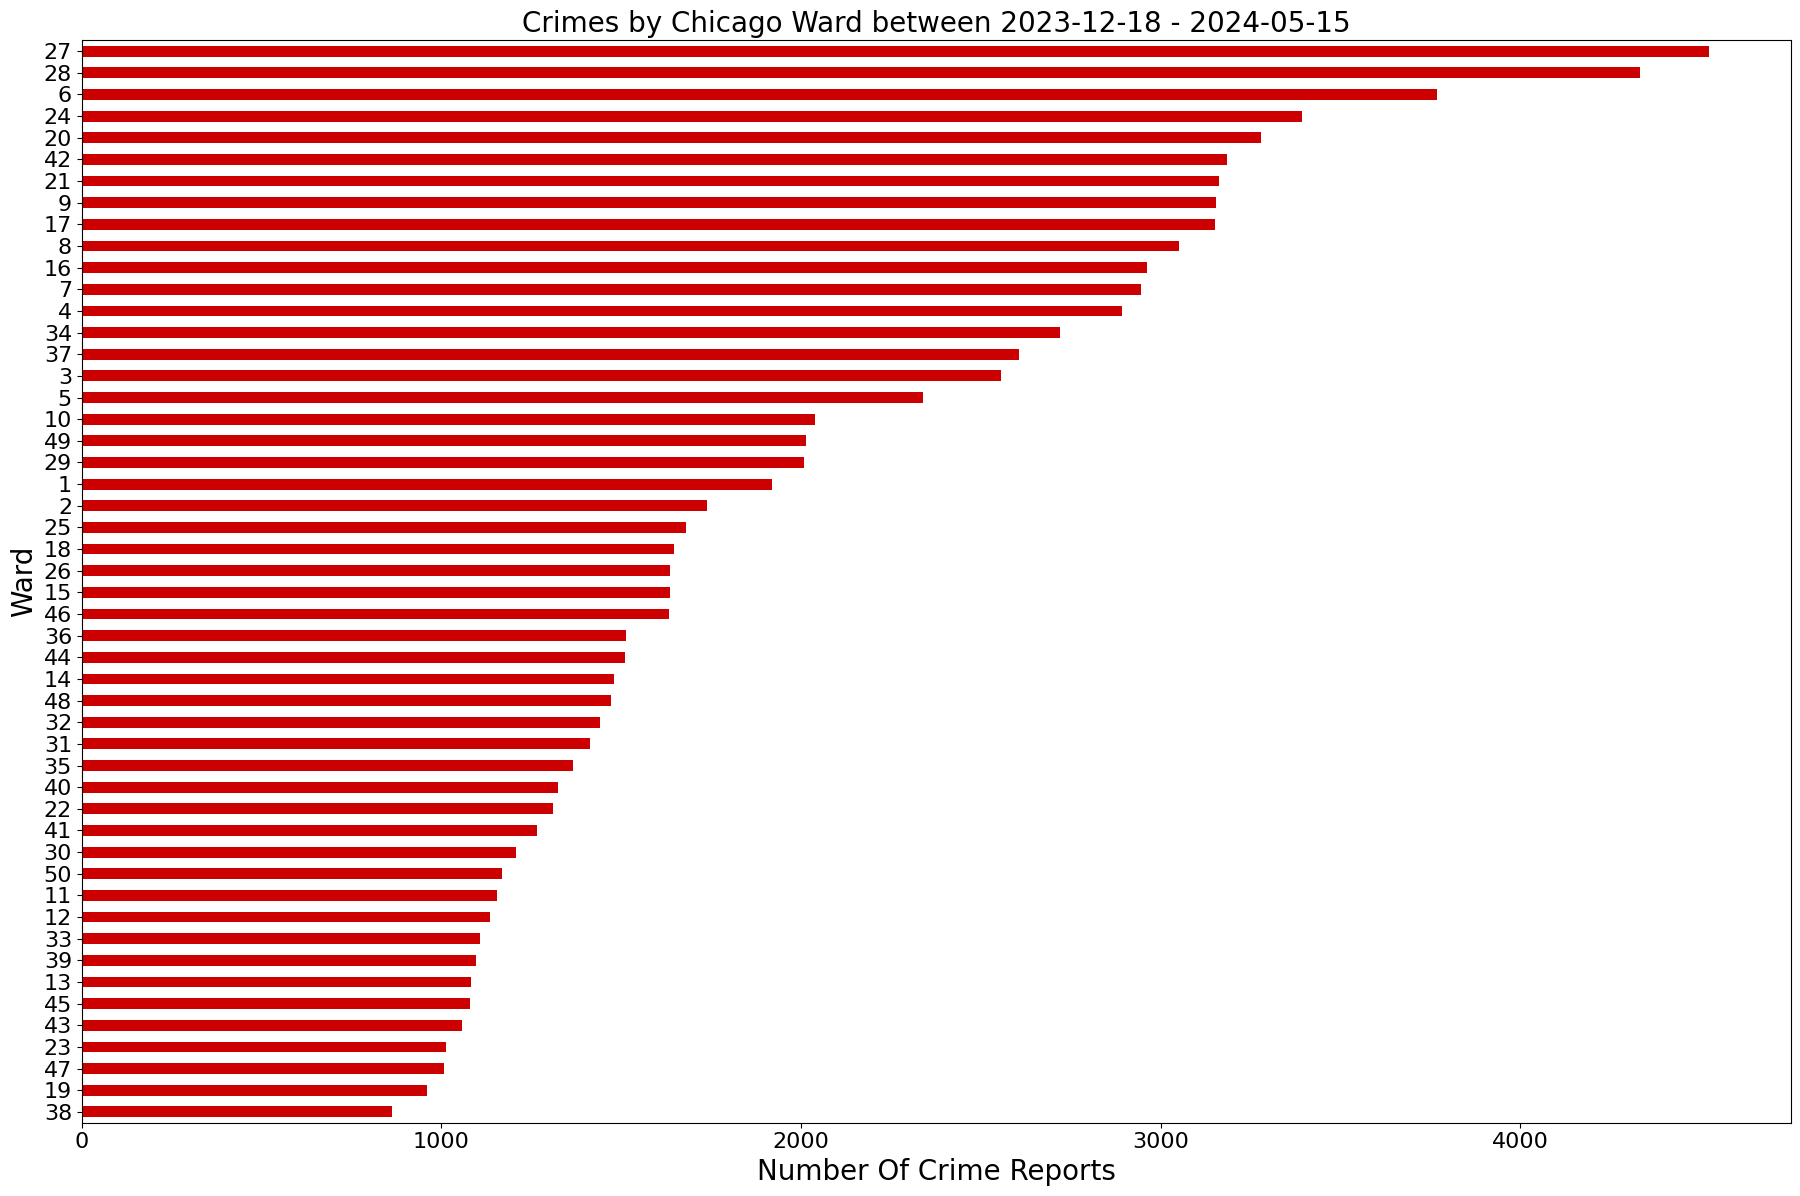

In [102]:
grouped_by_ward = crime_data_2.groupby('ward')

countWards = grouped_by_ward['ward'].value_counts().sort_values()

countWards.plot(kind = 'barh', figsize = (18, 12), color = '#cc0000')

plt.xlabel('Number Of Crime Reports', fontsize = 20)

plt.ylabel('Ward', fontsize = 20)

start_date = str(crime_data_2.head(1)['date_of_occurrence'])[5:15]

end_date = str(crime_data_2.tail(1)['date_of_occurrence'])[9:19]

plt.title('Crimes by Chicago Ward between ' + start_date + ' - ' + end_date, fontsize = 20)

plt.tight_layout()

plt.xticks(fontsize = 16)

plt.yticks(fontsize = 16)

ax = plt.gca()

#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


This cell below transforms the data in order to show the total number of crimes committed by crime type. The column called _primary_decscription denotes the crime type.

In [122]:
%%time

crime_types = crime_data_2[['_primary_decsription']] # return a DF

crime_type_totals = pd.DataFrame(crime_types.groupby('_primary_decsription').size() )

crime_type_totals.rename(columns = {0 : 'total'}, inplace=True)

CPU times: total: 46.9 ms
Wall time: 37.8 ms


The cell below shows a bar plot with the crimes types in Chicago.

In [160]:
crime_type_totals.head(10)

# Ensure 'total' column is numeric

crime_type_totals['total'] = pd.to_numeric(crime_type_totals['total'], errors='coerce')

# Sort values by number of crimes per each crime type.

crime_type_totals.sort_values(by='total', ascending=True, inplace=True)

Text(0, 0.5, 'Crime Type')

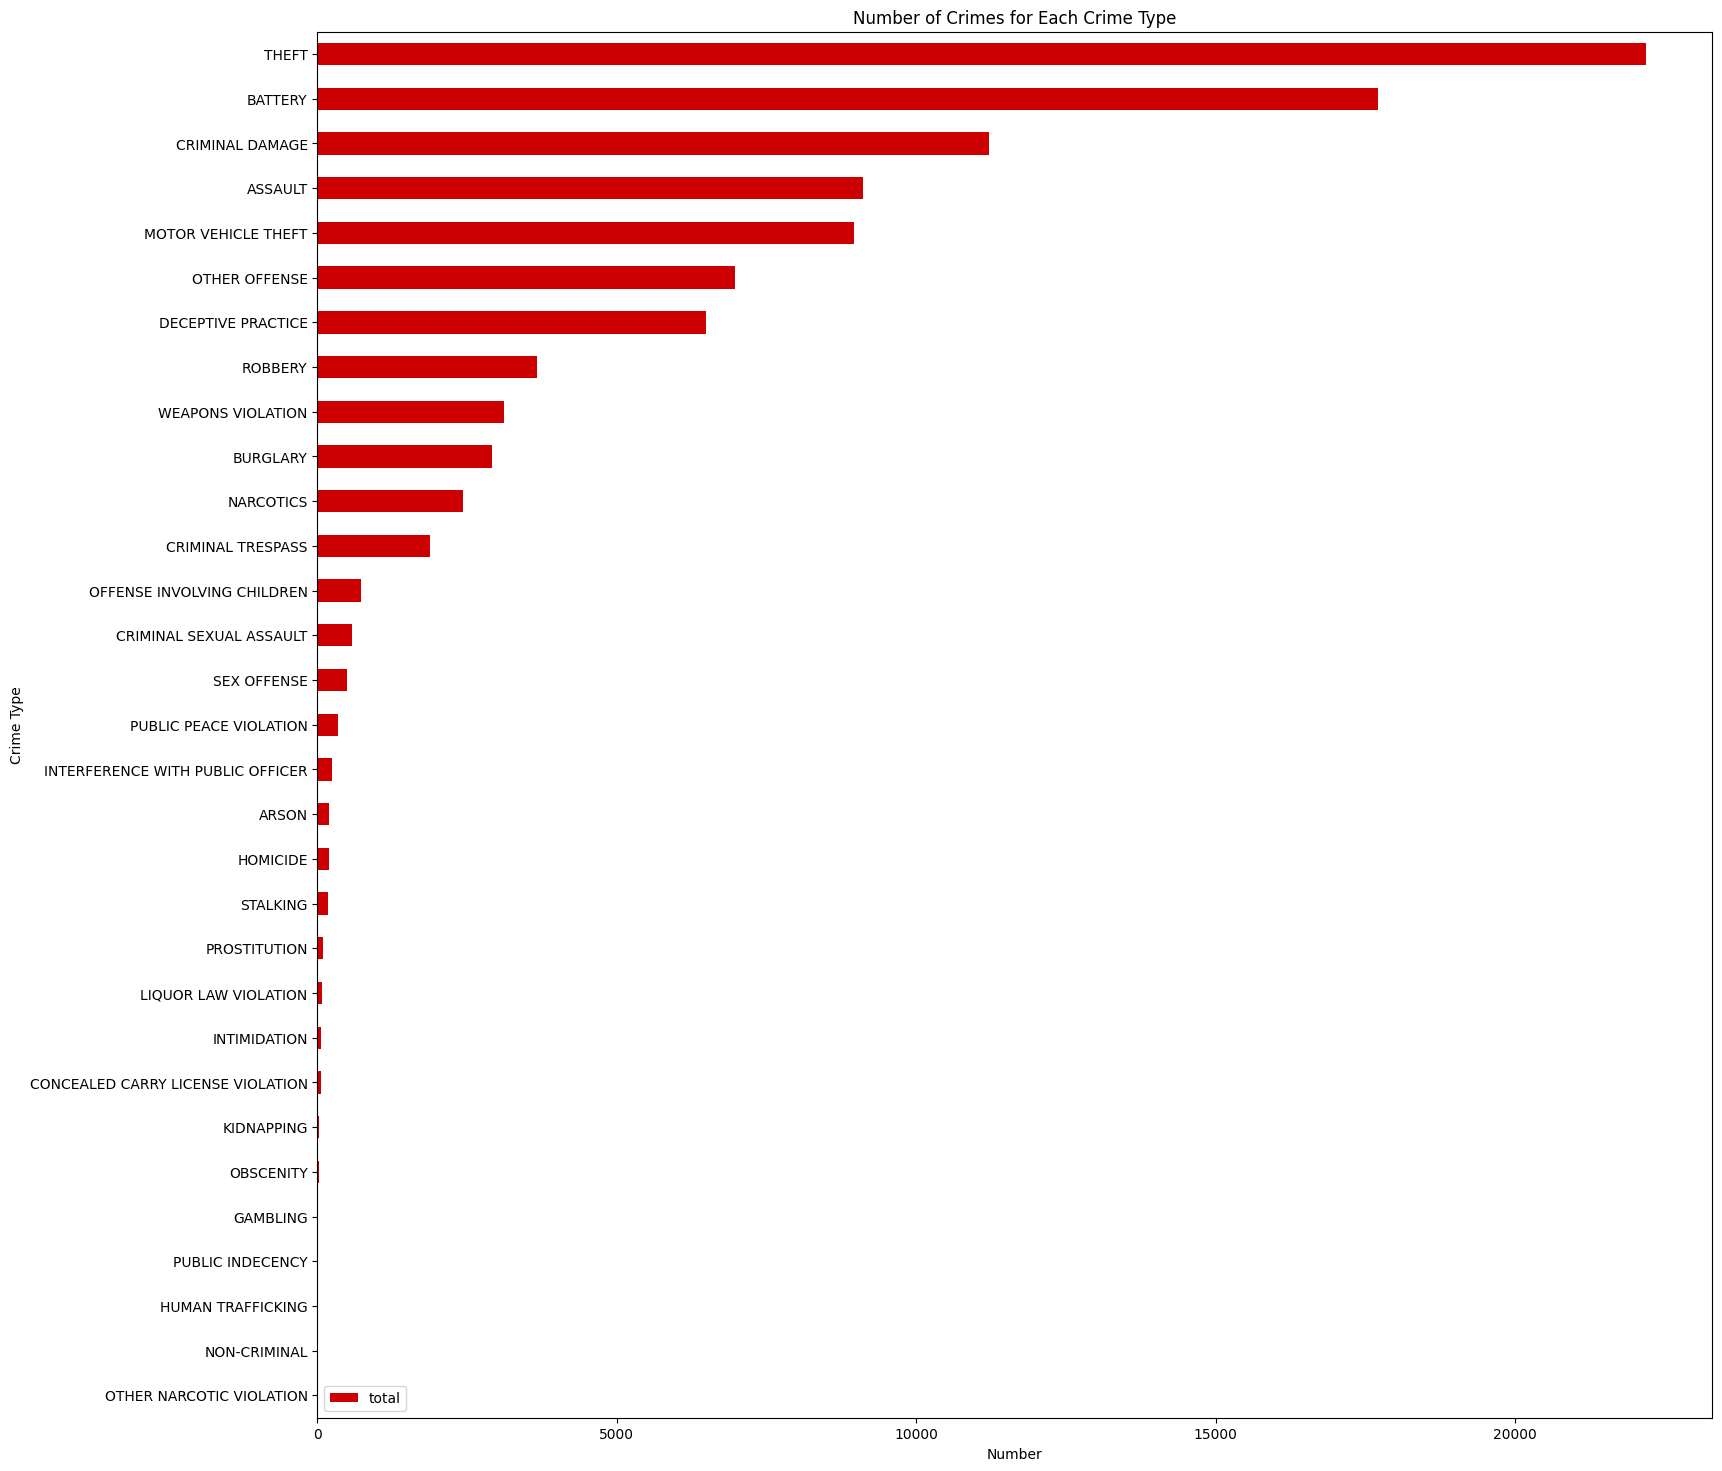

In [168]:
# Select a plot to use to display the total number of occurrences for each crime type.
crime_type_totals.plot(kind = 'barh', figsize = (18, 18), color = '#cc0000')

plt.title("Number of Crimes for Each Crime Type")

plt.xlabel("Number")

plt.ylabel("Crime Type")

In [148]:
crime_type_totals.head(10)

total
_primary_decsription                    
ARSON                                199
ASSAULT                             9105
BATTERY                            17706
BURGLARY                            2918
CONCEALED CARRY LICENSE VIOLATION     60
CRIMINAL DAMAGE                    11217
CRIMINAL SEXUAL ASSAULT              577
CRIMINAL TRESPASS                   1888
DECEPTIVE PRACTICE                  6482
GAMBLING                               6

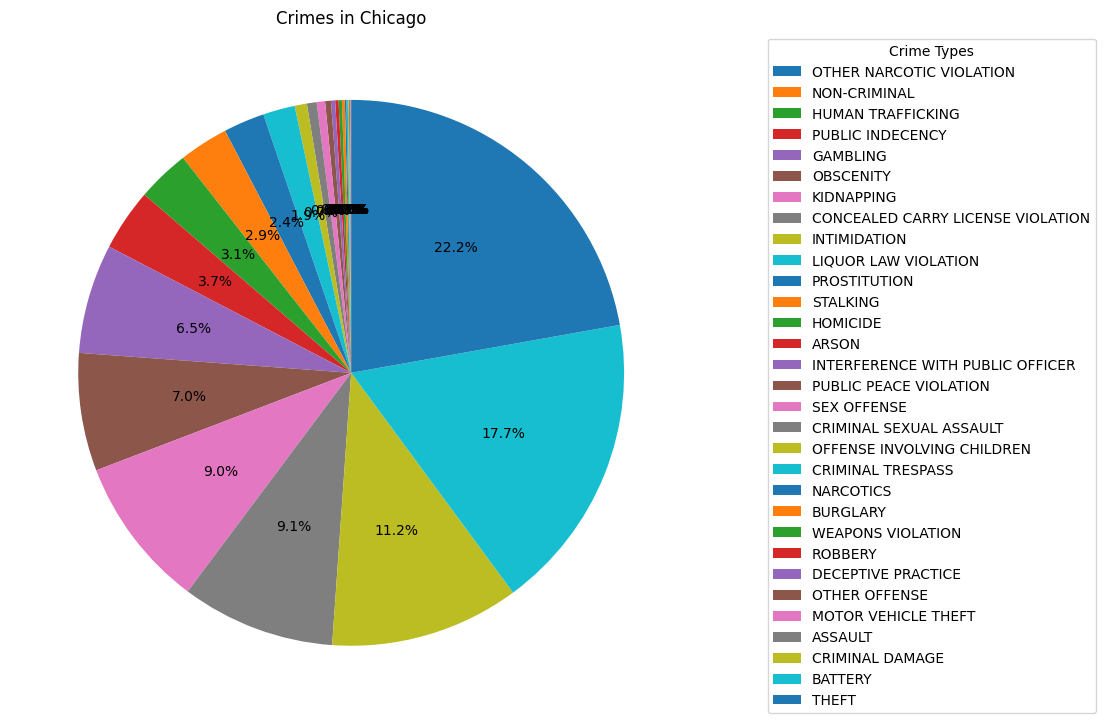

In [190]:
# Make a pie plot of the data to show what types of crimes are most prevalent.
plt.figure(figsize=(12,8))

plt.pie(crime_type_totals['total'], autopct='%1.1f%%', startangle=90)

# Add legend outside the pie chart
plt.legend(
    labels=crime_type_totals.index,  # Labels corresponding to crime types
    title="Crime Types",  # Title for the legend
    bbox_to_anchor=(1.1, 1),  # Position legend outside the chart
    loc='upper left',  # Location of the legend
    fontsize=10  # Adjust font size for readability
)

plt.title("Crimes in Chicago")

plt.tight_layout()

plt.show()